In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
current_dir = os.getcwd()
print(current_dir)


/content


In [ ]:
ACRIMA = current_dir + '/drive/MyDrive/FYP/dataset/ACRIMA'
ACRIMA_TEST = ACRIMA + '/PARTITIONED/Testing'
ACRIMA_TEST_NORMAL = ACRIMA_TEST + '/normal'
ACRIMA_TEST_GLAUCOMA = ACRIMA_TEST + '/glaucoma'
ACRIMA_TRAIN = ACRIMA + '/PARTITIONED/Training'
ACRIMA_TRAIN_NORMAL = ACRIMA_TRAIN + '/normal'
ACRIMA_TRAIN_GLAUCOMA = ACRIMA_TRAIN + '/glaucoma'
acrima_glaucoma_images = os.listdir(ACRIMA_TRAIN_GLAUCOMA) + os.listdir(ACRIMA_TEST_GLAUCOMA)
acrima_normal_images = os.listdir(ACRIMA_TRAIN_NORMAL) + os.listdir(ACRIMA_TEST_NORMAL)
print("ACRIMA dataset contains :")
print(f"\t{len(acrima_glaucoma_images)} glaucomatous fundus images")
print(f"\t{len(acrima_normal_images)} normal fundus images")

ACRIMA dataset contains :
	396 glaucomatous fundus images
	309 normal fundus images


In [ ]:
DRISHTI_GS = current_dir + '/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS'
DRISHTI_GS_TEST = DRISHTI_GS + '/Testing'
DRISHTI_GS_TEST_NORMAL = DRISHTI_GS_TEST + '/normal'
DRISHTI_GS_TEST_GLAUCOMA = DRISHTI_GS_TEST + '/glaucoma'
DRISHTI_GS_TRAIN = DRISHTI_GS + '/Training'
DRISHTI_GS_TRAIN_NORMAL = DRISHTI_GS_TRAIN + '/normal'
DRISHTI_GS_TRAIN_GLAUCOMA = DRISHTI_GS_TRAIN + '/glaucoma'
dristhi_glaucoma_images = os.listdir(DRISHTI_GS_TRAIN_GLAUCOMA)+os.listdir(DRISHTI_GS_TEST_GLAUCOMA)
dristhi_normal_images = os.listdir(DRISHTI_GS_TRAIN_NORMAL)+os.listdir(DRISHTI_GS_TEST_NORMAL)
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} glucomateous fundus images")
print(f"\t{len(dristhi_normal_images)} normal fundus images")

Dristhi dataset contains :
	70 glucomateous fundus images
	31 normal fundus images


In [ ]:
RIM_ONE = current_dir + '/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED'
RIM_ONE_TEST = RIM_ONE + '/Testing'
RIM_ONE_TEST_NORMAL = RIM_ONE_TEST + '/normal'
RIM_ONE_TEST_GLAUCOMA = RIM_ONE_TEST + '/glaucoma'
RIM_ONE_TRAIN = RIM_ONE + '/Training'
RIM_ONE_TRAIN_NORMAL = RIM_ONE_TRAIN + '/normal'
RIM_ONE_TRAIN_GLAUCOMA = RIM_ONE_TRAIN + '/glaucoma'
rim_one_glaucoma_images = os.listdir(RIM_ONE_TRAIN_GLAUCOMA) + os.listdir(RIM_ONE_TEST_GLAUCOMA)
rim_one_normal_images = os.listdir(RIM_ONE_TRAIN_NORMAL) + os.listdir(RIM_ONE_TEST_NORMAL)
print("RIM_ONE dataset contains :")
print(f"\t{len(rim_one_glaucoma_images)} glaucomatous fundus images")
print(f"\t{len(rim_one_normal_images)} normal fundus images")

RIM_ONE dataset contains :
	172 glaucomatous fundus images
	313 normal fundus images


ACRIMA glaucoma images:


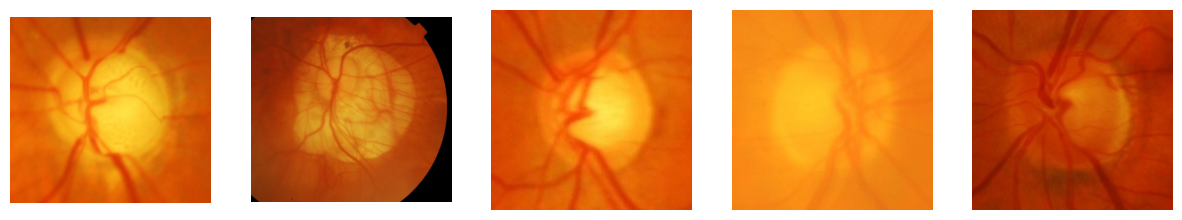

ACRIMA normal images:


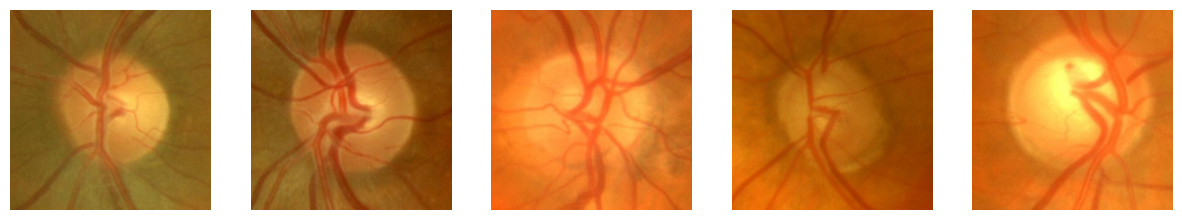

In [ ]:
print("ACRIMA glaucoma images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(ACRIMA_TRAIN_GLAUCOMA, acrima_glaucoma_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

# Plotting normal images
print("ACRIMA normal images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(ACRIMA_TRAIN_NORMAL, acrima_normal_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

DRISTHI glaucoma images:


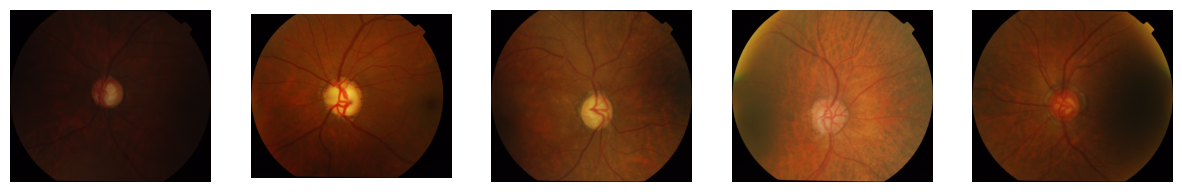

DRISTHI normal images:


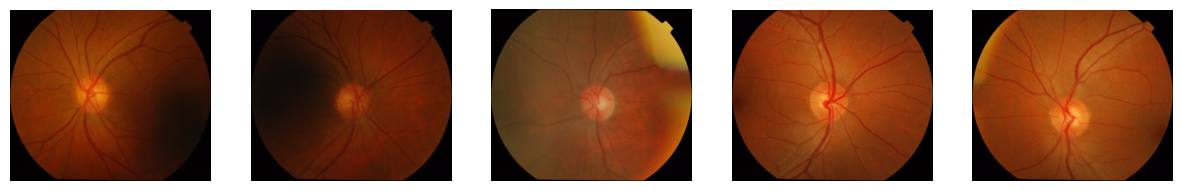

In [ ]:
print("DRISTHI glaucoma images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(DRISHTI_GS_TRAIN_GLAUCOMA, dristhi_glaucoma_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

# Plotting normal images
print("DRISTHI normal images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(DRISHTI_GS_TRAIN_NORMAL, dristhi_normal_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

RIM glaucoma images:


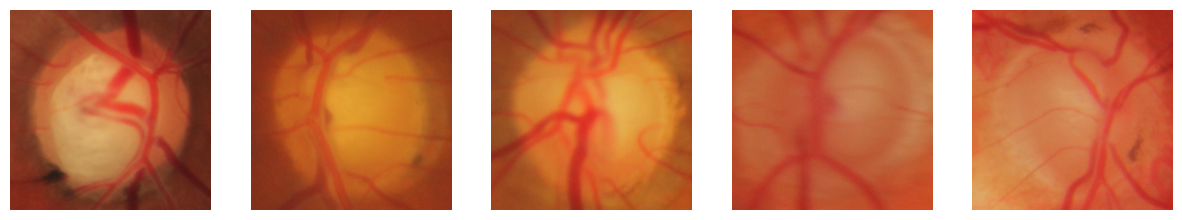

RIM normal images:


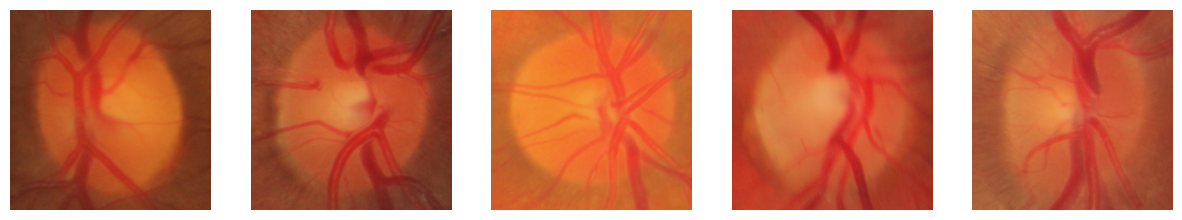

In [ ]:
print("RIM glaucoma images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(RIM_ONE_TRAIN_GLAUCOMA, rim_one_glaucoma_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

# Plotting normal images
print("RIM normal images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(RIM_ONE_TRAIN_NORMAL, rim_one_normal_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

In [ ]:
import os
import shutil
import pathlib
!pip install split-folders
import splitfolders
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Create the base directory for the combined dataset
base_dir = '/content/drive/MyDrive/FYP/combine'
os.makedirs(base_dir, exist_ok=True)

In [ ]:
# Define paths for glaucoma and normal images
glaucoma_paths = [
    '/content/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS/Testing/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS/Training/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/ACRIMA/PARTITIONED/Testing/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/ACRIMA/PARTITIONED/Training/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED/Testing/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED/Training/glaucoma'


]
normal_paths = [
    '/content/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS/Testing/normal',
    '/content/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS/Training/normal',
    '/content/drive/MyDrive/FYP/dataset/ACRIMA/PARTITIONED/Testing/normal',
    '/content/drive/MyDrive/FYP/dataset/ACRIMA/PARTITIONED/Training/normal',
    '/content/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED/Testing/normal',
    '/content/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED/Training/normal'

]

# Define destination directories for glaucoma and normal
glaucoma_dest = os.path.join(base_dir, 'glaucoma')
normal_dest = os.path.join(base_dir, 'normal')
os.makedirs(glaucoma_dest, exist_ok=True)
os.makedirs(normal_dest, exist_ok=True)

In [ ]:
# Function to copy images from source paths to destination
def copy_images(source_paths, destination):
    for path in source_paths:
        if not os.path.exists(path):
            print(f"Warning: Path does not exist: {path}")
            continue
        shutil.copytree(path, destination, dirs_exist_ok=True)

# Copy images for glaucoma and normal classes
print("Copying glaucoma images...")
copy_images(glaucoma_paths, glaucoma_dest)
print("Copying normal images...")
copy_images(normal_paths, normal_dest)

Copying glaucoma images...
Copying normal images...


In [ ]:
# Verify the number of images in each class
glaucoma_images = [fn for fn in os.listdir(glaucoma_dest) if os.path.isfile(os.path.join(glaucoma_dest, fn))]
normal_images = [fn for fn in os.listdir(normal_dest) if os.path.isfile(os.path.join(normal_dest, fn))]
print(f"Total glaucoma images: {len(glaucoma_images)}")
print(f"Total normal images: {len(normal_images)}")

Total glaucoma images: 638
Total normal images: 653


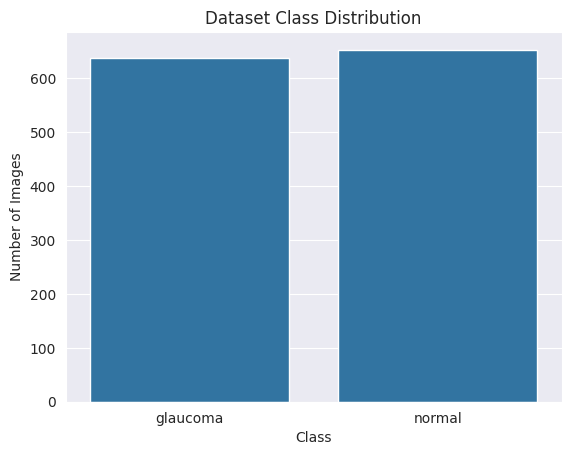

In [ ]:

# Dataset statistics
dataset_classes = ['glaucoma', 'normal']
data_counts = [len(glaucoma_images), len(normal_images)]
# Plot statistics
sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_counts)
plt.title('Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
base_dir = '/content/drive/MyDrive/FYP/combine'
# Split the combined dataset into train, validation, and test sets
print("Splitting the dataset...")
splitfolders.ratio(
    base_dir,
    output='/content/drive/MyDrive/FYP/split',
    seed=1337,
    ratio=(0.8, 0.1, 0.1),
    group_prefix=None
)

print("Dataset split completed.")


Splitting the dataset...


NameError: name 'splitfolders' is not defined

In [ ]:
# Check the split directories
train_glaucoma = '/content/drive/MyDrive/FYP/split/train/glaucoma'
train_normal = '/content/drive/MyDrive/FYP/split/train/normal'
val_glaucoma = '/content/drive/MyDrive/FYP/split/val/glaucoma'
val_normal = '/content/drive/MyDrive/FYP/split/val/normal'
test_glaucoma = '/content/drive/MyDrive/FYP/split/test/glaucoma'
test_normal = '/content/drive/MyDrive/FYP/split/test/normal'

# List and print the number of files in each split folder
print(f"Train Glaucoma: {len(os.listdir(train_glaucoma))} images")
print(f"Train Normal: {len(os.listdir(train_normal))} images")
print(f"Validation Glaucoma: {len(os.listdir(val_glaucoma))} images")
print(f"Validation Normal: {len(os.listdir(val_normal))} images")
print(f"Test Glaucoma: {len(os.listdir(test_glaucoma))} images")
print(f"Test Normal: {len(os.listdir(test_normal))} images")

Train Glaucoma: 510 images
Train Normal: 522 images
Validation Glaucoma: 63 images
Validation Normal: 65 images
Test Glaucoma: 65 images
Test Normal: 66 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions & batch size
img_height = 256
img_width = 256
batch_size = 32

# 🔹 Data augmentation ONLY for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)

# 🔹 NO augmentation for validation & test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# 🔹 Load Training Data
train_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # ✅ Randomize training samples
)

# 🔹 Load Validation Data
val_ds = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # ✅ Keep order consistent
)

# 🔹 Load Test Data
test_ds = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # ✅ Keep order consistent
)


Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [3]:
# Image dimensions & batch size
img_height = 256
img_width = 256
batch_size = 32

def apply_clahe_on_v(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(image_hsv)

    # Ensure V channel is uint8 before applying CLAHE
    v = v.astype(np.uint8)

    # Apply CLAHE on the V channel
    clahe = cv2.createCLAHE(clipLimit=5)
    v_clahe = clahe.apply(v)

    # Convert v_clahe back to the same type as h and s
    v_clahe = v_clahe.astype(h.dtype)

    # Ensure all channels have the same shape
    if v_clahe.shape != h.shape:
        v_clahe = cv2.resize(v_clahe, (h.shape[1], h.shape[0]))

    # Merge back and convert to BGR
    image_hsv_clahe = cv2.merge((h, s, v_clahe))
    final_image = cv2.cvtColor(image_hsv_clahe, cv2.COLOR_HSV2BGR)

    # Convert to float32 and scale between [0,1]
    final_image = final_image.astype(np.float32) / 255.0

    return final_image

# Custom preprocessing function
def custom_preprocessing(image):
    image_np = np.array(image)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)  # Convert to OpenCV format
    processed_img = apply_clahe_on_v(image_np)
    processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)  # Convert back to RGB
    return processed_img

# **Train Generator (With Augmentation)**
train_datagen = ImageDataGenerator(

    preprocessing_function=custom_preprocessing,  # Apply CLAHE
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)

# **Validation Generator (No Augmentation, Only CLAHE)**
val_datagen = ImageDataGenerator(

    preprocessing_function=custom_preprocessing  # Only CLAHE, no augmentations
)

# **Test Generator (No Augmentation, Only CLAHE)**
test_datagen = ImageDataGenerator(

    preprocessing_function=custom_preprocessing  # Only CLAHE, no augmentations
)

# Load Training Data
train_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load Validation Data
val_ds = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load Test Data
test_ds = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Image dimensions
img_height, img_width = 256, 256

# Load NASNetMobile as base model
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = True  # Enable fine-tuning

# Freeze early layers, train deeper layers
for layer in base_model.layers[:-30]:  # Freeze first 80% of the network
    layer.trainable = False

# Build classifier head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  # Increased dropout for regularization
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(2, activation='softmax')(x)  # Softmax for binary classification

# Create model
model = Model(inputs=base_model.input, outputs=x)

# Learning rate scheduling
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.8
)

# Compile model
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for better training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# Model summary
model.summary()


19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv1 (Conv2D)       │ (None, 127, 127, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn1                  │ (None, 127, 127, 32)   │            128 │ stem_conv1[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 127, 127, 32)   │              0 │ stem_bn1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reduction_conv_1_stem_1   │ (None, 127, 127, 11)   │            352 │ activation[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reduction_bn_1_stem_1     │ (None, 127, 127, 11)   │             44 │ reduction_conv_1_stem… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 127, 127, 11)   │              0 │ reduction_bn_1_stem_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 127, 127, 32)   │              0 │ stem_bn1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_pad_red… │ (None, 131, 131, 11)   │              0 │ activation_1[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_pad_red… │ (None, 133, 133, 32)   │              0 │ activation_3[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_reducti… │ (None, 64, 64, 11)     │            396 │ separable_conv_1_pad_… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_reducti… │ (None, 64, 64, 11)     │          1,920 │ separable_conv_1_pad_… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_bn_redu… │ (None, 64, 64, 11)     │             44 │ separable_conv_1_redu… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_bn_redu… │ (None, 64, 64, 11)     │             44 │ separable_conv_1_redu… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 64, 64, 11)     │              0 │ separable_conv_1_bn_r… │
├──────────────────────

 Total params: 4,413,910 (16.84 MB)

 Trainable params: 315,890 (1.21 MB)

 Non-trainable params: 4,098,020 (15.63 MB)

In [ ]:
model.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 12.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


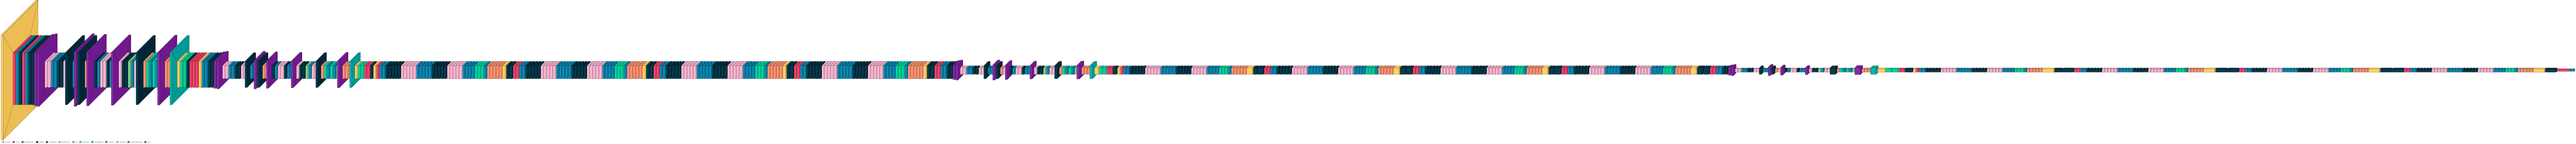

In [ ]:
!pip install visualkeras
import visualkeras
from PIL import ImageFont

# Optional: Load a font (adjust path for Colab if needed)
# try:
#     font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 20)
# except OSError:
#     font = None

# Visualize the model
image = visualkeras.layered_view(
    model,
    legend=True,
    to_file="model_visualization.png"  # Save visualization to file
)

# Display the visualization in Colab
from IPython.display import Image
Image("model_visualization.png")


In [5]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_ds,
    epochs=100,  # Max epochs, but training may stop earlier
    validation_data=val_ds,
    callbacks = [early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 577s 16s/step - accuracy: 0.5668 - loss: 0.9998 - val_accuracy: 0.7266 - val_loss: 0.5977
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7026 - loss: 0.6452 - val_accuracy: 0.6641 - val_loss: 0.6021
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7491 - loss: 0.5774 - val_accuracy: 0.6875 - val_loss: 0.5638
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7484 - loss: 0.6256 - val_accuracy: 0.6953 - val_loss: 0.6091
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7873 - loss: 0.4996 - val_accuracy: 0.7656 - val_loss: 0.5341
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8070 - loss: 0.4439 - val_accuracy: 0.7422 - val_loss: 0.5280
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7843 - loss: 0.5124 - val_accuracy: 0.7578 - val_loss: 0.5308
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8086 - loss: 0.4777 - val_accuracy: 0.7578 -

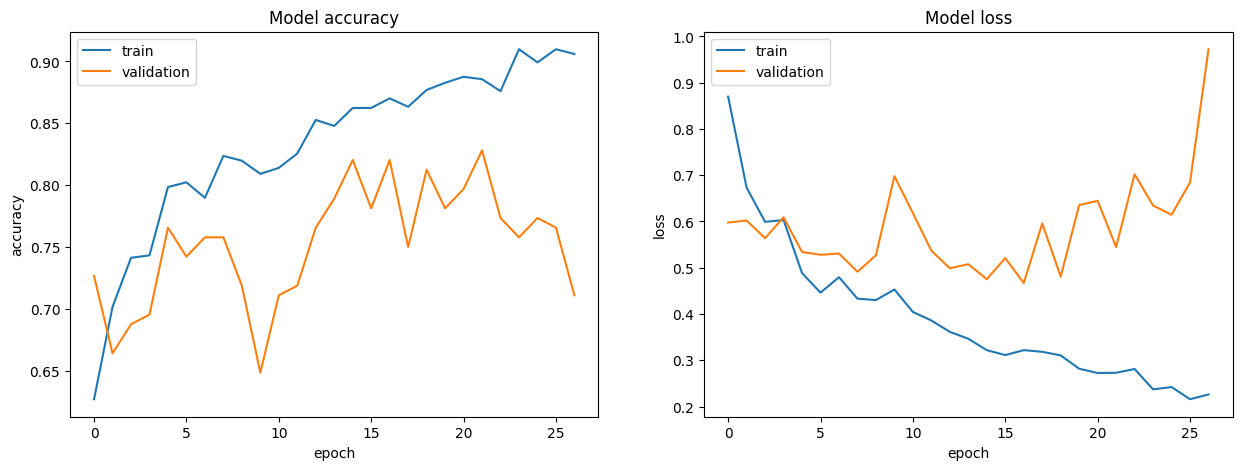

In [ ]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(history)

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 16s/step - accuracy: 0.6717 - loss: 0.6796
Loss: 0.567006528377533 Accuracy: 0.7480915784835815


In [ ]:
model.save('/content/drive/MyDrive/FYP/combine_model/nasnetMobile/NasClaheNew1.h5')
model.save('/content/drive/MyDrive/FYP/combine_model/nasnetMobile/NasClaheNew1.keras')

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb
import pandas as pd

In [ ]:
model=load_model('/content/drive/MyDrive/FYP/combine_model/nasnetMobile/NasClaheNew1.keras')
print("Glaucoma detection model loaded")

Glaucoma detection model loaded


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 40 variables whereas the saved optimizer has 77 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model


image_dir = '/content/drive/MyDrive/FYP/dataset/ORIGA/ORIGA/Testing/normal' # Replace with your image directory
img_height, img_width = 256, 256


# Function to preprocess a single image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Get a list of image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Randomly select 10 images
num_images_to_process = 10
if len(image_files) < num_images_to_process:
    print(f"Warning: Only {len(image_files)} images found in directory. Processing all of them.")
    selected_images = image_files
else:
    selected_images = random.sample(image_files, num_images_to_process)

# Process each selected image
for image_file in selected_images:
    image_path = os.path.join(image_dir, image_file)
    try:
        preprocessed_img = preprocess_image(image_path)
        predictions = model.predict(preprocessed_img)
        print(f"Predictions for {image_file}: {predictions}") # Process predictions as needed
        res = np.argmax(predictions)
        if res == 0:
            print(f"This is a glaucoma image")
        else:
          print(f"This is a normal image")

    except Exception as e:
        print(f"Error processing {image_file}: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Predictions for 501.jpg: [[0.12308507 0.87691486]]
This is a normal image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predictions for 467.jpg: [[0.5886586  0.41134143]]
This is a glaucoma image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predictions for 489.jpg: [[0.18098496 0.8190151 ]]
This is a normal image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predictions for 611.jpg: [[0.71053904 0.28946102]]
This is a glaucoma image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predictions for 587.jpg: [[0.81432575 0.18567427]]
This is a glaucoma image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predictions for 643.jpg: [[0.85090363 0.14909631]]
This is a glaucoma image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predictions for 536.jpg: [[0.08216707 0.917833  ]]
This is a normal image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predictions for 639.jpg: [[0.7257434  0.27425656]]
This is a glaucoma image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predictions for 552.jpg: [[0.09018368 0.90981627]]
This 

In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step
[[38  6]
 [27 60]]


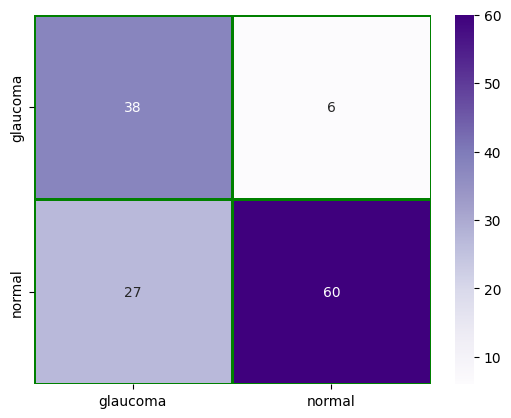

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df